In [1]:
import wrangle as w

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats


In [2]:
df = w.get_data()

In [3]:
train, val, test = w.train_validate_test(df, 'diabetic')

In [4]:
train.shape, val.shape, test.shape

((53321, 9), (22853, 9), (19044, 9))

In [5]:
train[train.blood_glucose_level > 200]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetic
37187,Female,55,0,0,former,45.52,6.0,300,1
8662,Female,72,1,0,No Info,27.32,9.0,260,1
40852,Female,64,0,0,former,23.80,6.1,300,1
74718,Female,80,0,0,never,24.97,7.5,240,1
94965,Male,75,1,1,ever,27.32,7.5,220,1
...,...,...,...,...,...,...,...,...,...
29807,Male,80,0,1,never,24.20,6.8,260,1
13030,Female,80,0,1,No Info,30.62,6.6,220,1
83222,Female,69,1,0,never,27.32,6.1,240,1
5402,Male,58,0,0,current,27.32,5.7,260,1


# Explore

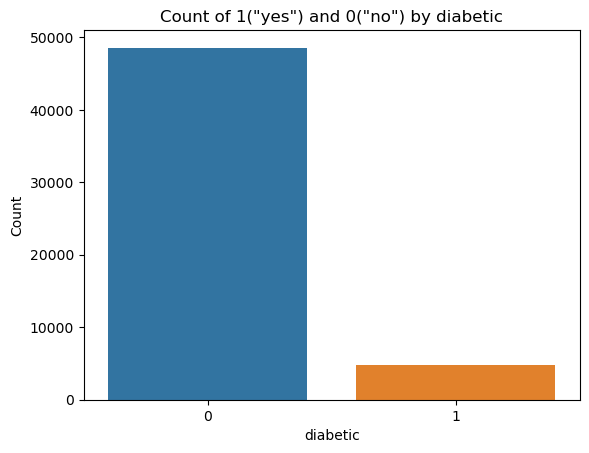

In [6]:

# create a bar plot
sns.countplot(x='diabetic', data=train)

# add axis labels and title
plt.xlabel('diabetic')
plt.ylabel('Count')
plt.title('Count of 1("yes") and 0("no") by diabetic')

# show the plot
plt.show()


In [7]:
train.diabetic.value_counts(normalize=True)

0    0.910917
1    0.089083
Name: diabetic, dtype: float64

In [8]:
val.diabetic.value_counts(normalize=True)

0    0.910909
1    0.089091
Name: diabetic, dtype: float64

In [9]:
test.diabetic.value_counts(normalize=True)

0    0.910943
1    0.089057
Name: diabetic, dtype: float64

- more without diabetes than with

### Distributions of features



In [10]:
train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetic'],
      dtype='object')

In [11]:
train.age.min(), train.age.max()

(1, 80)

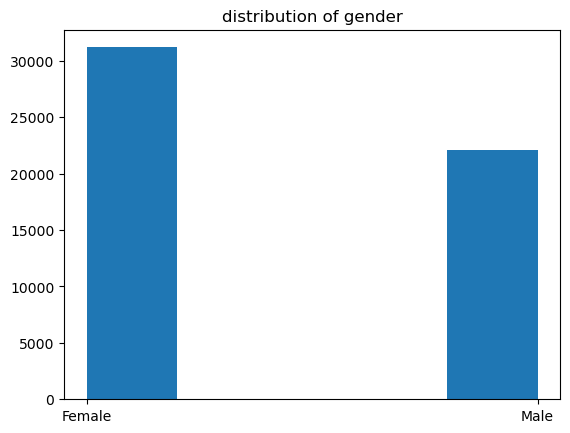

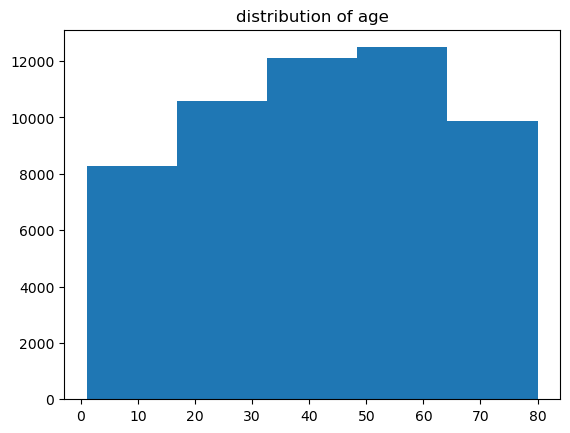

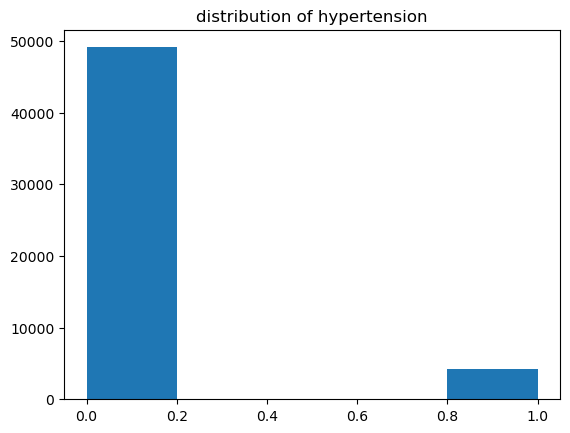

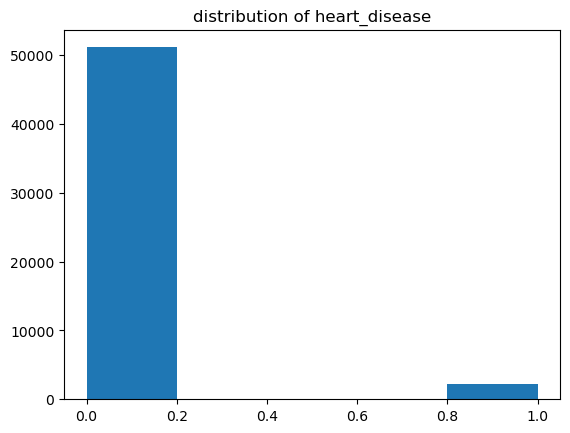

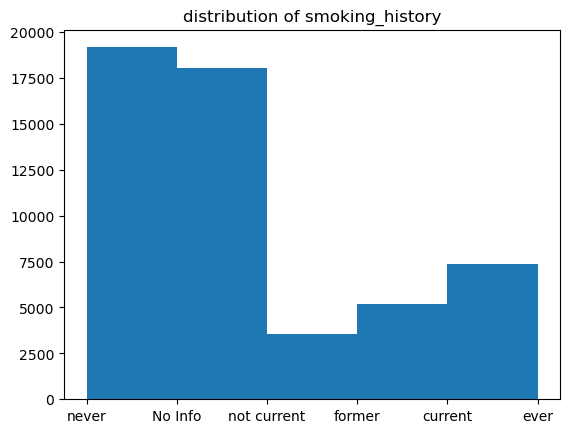

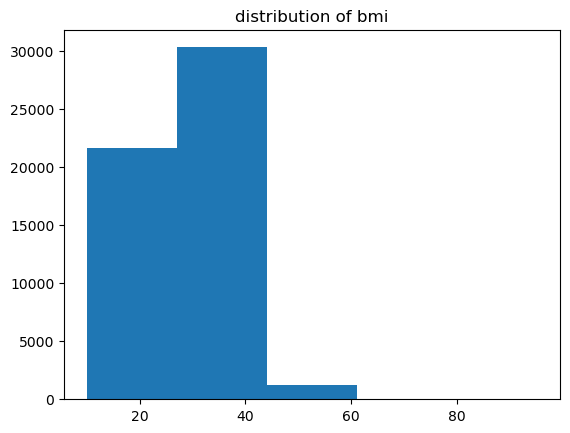

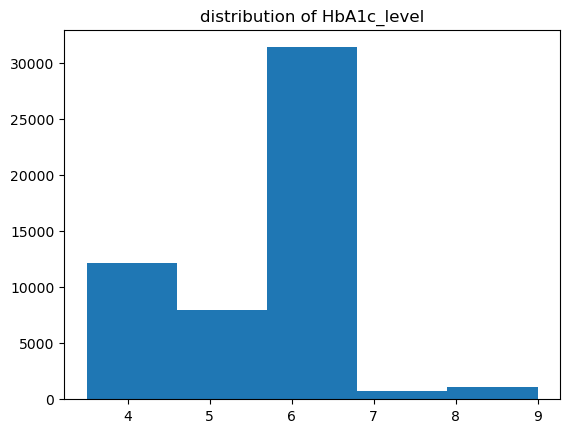

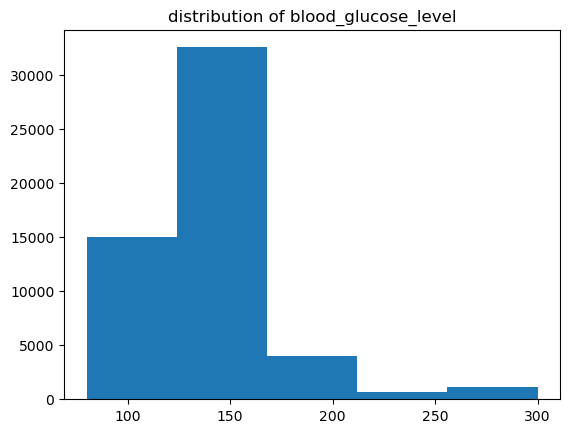

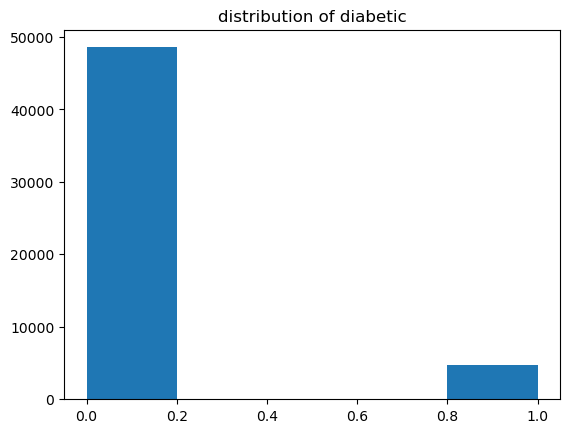

In [12]:
for col in df.columns:
    train[col].hist(bins=5, grid=False)
    plt.title(f'distribution of {col}')
    plt.show()

In [13]:
train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetic'],
      dtype='object')

In [14]:
num_cols = ['bmi', 'HbA1c_level', 'blood_glucose_level']
cat_cols = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetic', 'age_bin']

In [15]:
explore_cols = num_cols + cat_cols

Univariate Feature analysis of feature bmi:


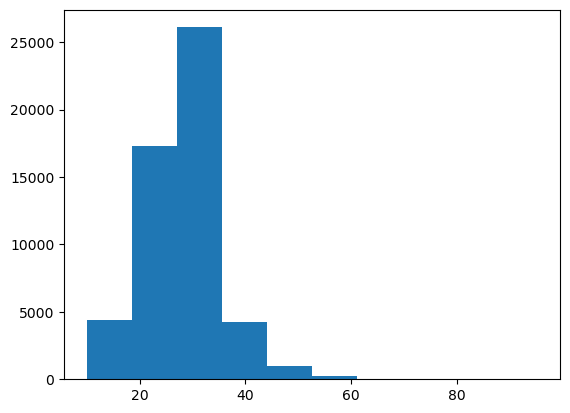

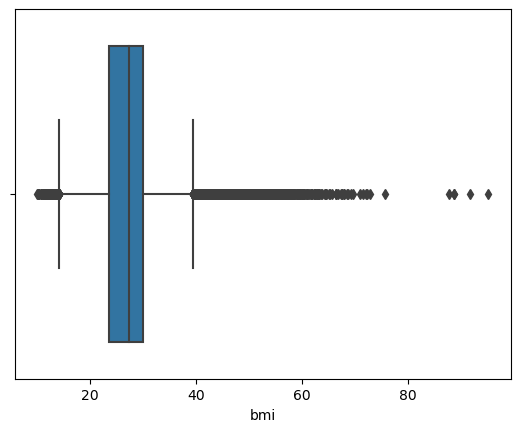

------------------------------
------------------------------
Univariate Feature analysis of feature HbA1c_level:


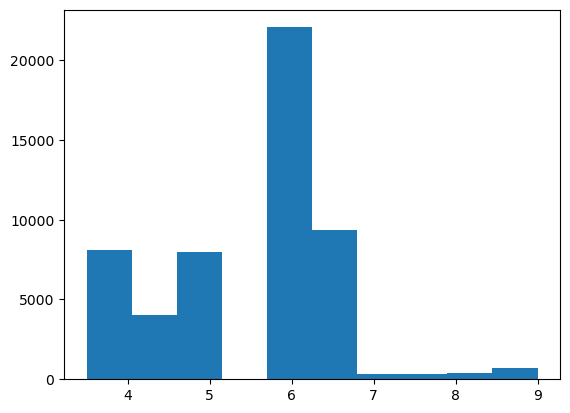

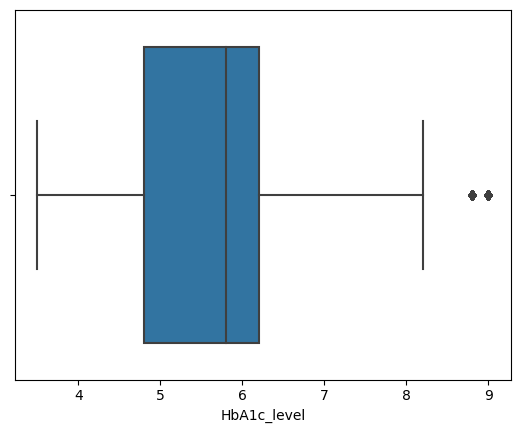

------------------------------
------------------------------
Univariate Feature analysis of feature blood_glucose_level:


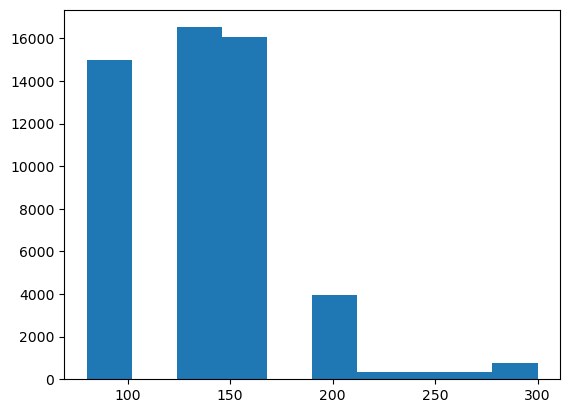

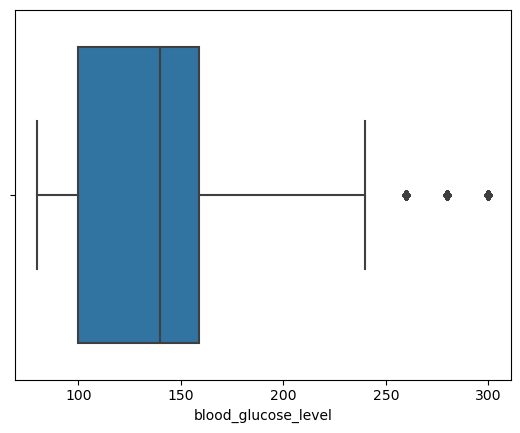

------------------------------
------------------------------
Univariate assessment of feature gender:


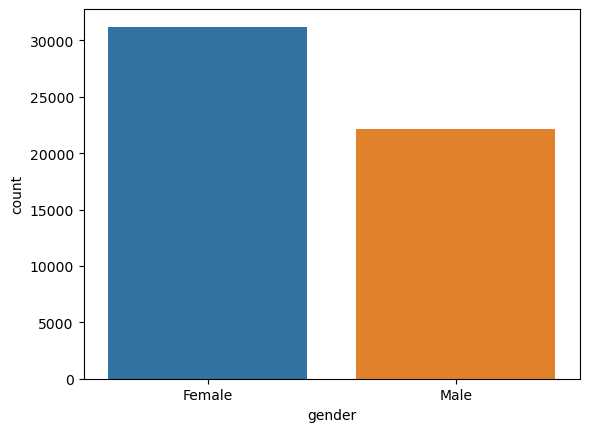

        gender    gender
Female   31207  0.585267
Male     22114  0.414733
------------------------------
------------------------------
Univariate assessment of feature hypertension:


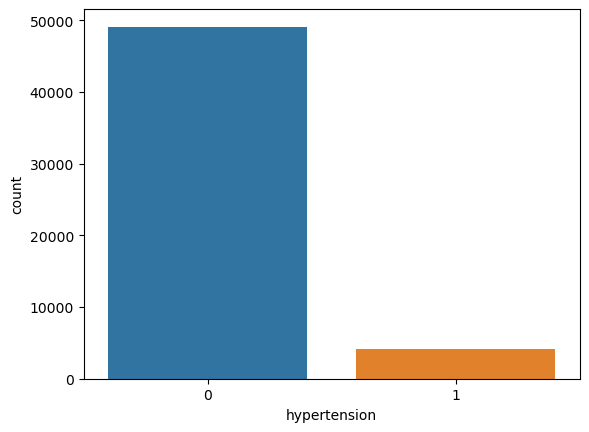

   hypertension  hypertension
0         49127      0.921344
1          4194      0.078656
------------------------------
------------------------------
Univariate assessment of feature heart_disease:


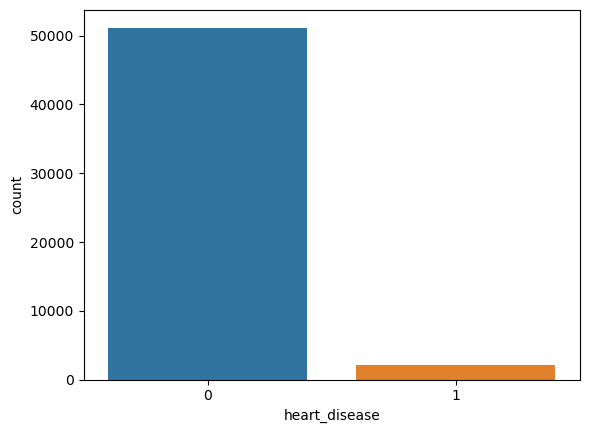

   heart_disease  heart_disease
0          51165       0.959566
1           2156       0.040434
------------------------------
------------------------------
Univariate assessment of feature smoking_history:


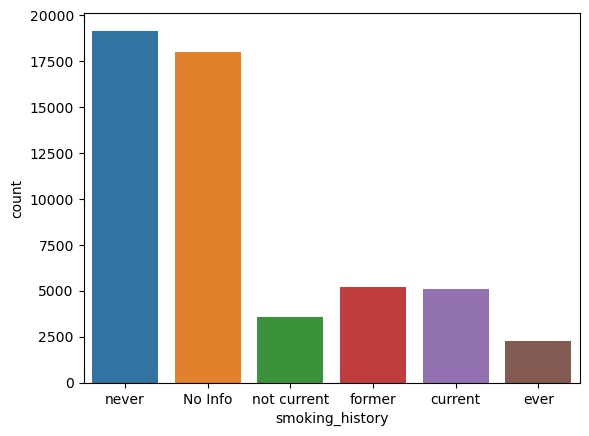

             smoking_history  smoking_history
never                  19167         0.359464
No Info                18026         0.338066
former                  5211         0.097729
current                 5109         0.095816
not current             3566         0.066878
ever                    2242         0.042047
------------------------------
------------------------------
Univariate assessment of feature diabetic:


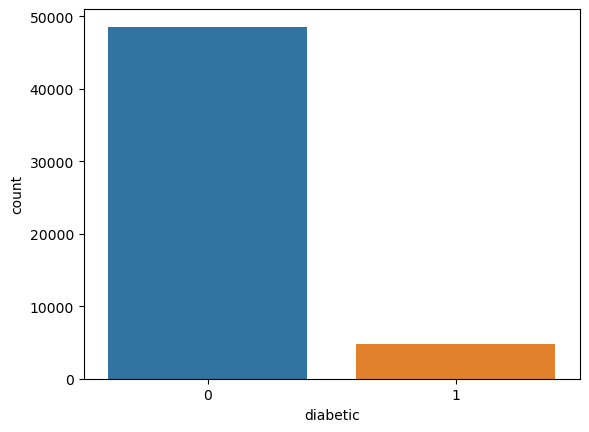

   diabetic  diabetic
0     48571  0.910917
1      4750  0.089083
------------------------------
------------------------------
Univariate assessment of feature age_bin:


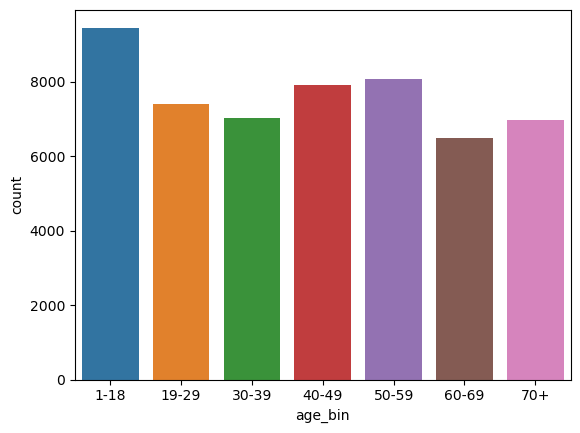

       age_bin   age_bin
1-18      9453  0.177285
50-59     8075  0.151441
40-49     7907  0.148291
19-29     7409  0.138951
30-39     7018  0.131618
70+       6966  0.130643
60-69     6493  0.121772
------------------------------
------------------------------


In [18]:
for col in explore_cols:
    if col in cat_cols:
        print(f'Univariate assessment of feature {col}:')
        sns.countplot(data=train, x=col)
        plt.show()
        print(
            pd.concat([train[col].value_counts(),
            train[col].value_counts(normalize=True)],
                 axis=1))
    else:
        print(f'Univariate Feature analysis of feature {col}:')
        plt.hist(train[col])
        plt.show()
        sns.boxplot(data=train, x=col)
        plt.show()
        train[col].describe()
    print('------------------------------')
    print('------------------------------')

In [ ]:
train[train.gender == 'Other']

## Does age play a role in diabetes?

#### H$o$: There is no role that age playes in diabetes
#### H$a$: Age does play a role in diabetes

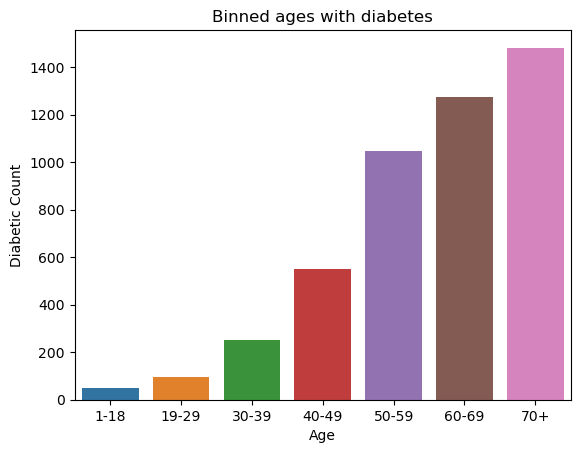

In [17]:
bins = [0, 18, 29, 39, 49, 59, 69, 80]
labels = ['1-18', '19-29', '30-39', '40-49', '50-59', '60-69', "70+"]
train['age_bin'] = pd.cut(train['age'], bins=bins, labels=labels)

# count the number of occurrences of each bin
diabetic_count = train[train['diabetic'] == 1].groupby('age_bin')['diabetic'].count()

# create a bar plot
sns.barplot(x=diabetic_count.index, y=diabetic_count)

# add axis labels and title
plt.xlabel('Age')
plt.ylabel('Diabetic Count')
plt.title('Binned ages with diabetes')

# show the plot
plt.show()


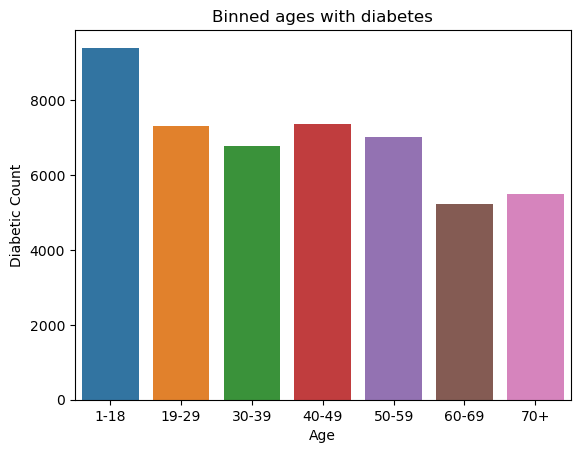

In [124]:
non_diabetic_count = train[train['diabetic'] == 0].groupby('age_bin')['diabetic'].count()

# create a bar plot
sns.barplot(x=non_diabetic_count.index, y=non_diabetic_count)

# add axis labels and title
plt.xlabel('Age')
plt.ylabel('Diabetic Count')
plt.title('Binned ages with diabetes')

# show the plot
plt.show()


- would seem that age and diabetes do have a positive correleation 
- I wonder if I'm looking at more type 2 diabetes 
- Will do a chisquared test on age binned and diabetics
- Alpha is 0.05

In [19]:
train[train.age_bin == '70+' ].age.min()

70

In [20]:
train[train.age_bin == '70+' ].age.max()

80

In [21]:
observed = pd.crosstab(train['age_bin'], train['diabetic'], margins=True)

In [22]:
observed

diabetic,0,1,All
age_bin,,,
1-18,9403,50,9453
19-29,7314,95,7409
30-39,6766,252,7018
40-49,7356,551,7907
50-59,7028,1047,8075
60-69,5220,1273,6493
70+,5484,1482,6966
All,48571,4750,53321


In [23]:
a = 0.05

In [24]:
chi2, p, _, hypothetical = stats.chi2_contingency(observed)

In [25]:
chi2, p

(4022.4310718160723, 0.0)

In [26]:
if p < a:
    print(f'We can reject our null hypothesis: {p} < {a}')
else:
    print('We have failed to reject our null hypothesis')

We can reject our null hypothesis: 0.0 < 0.05


## How is A1C affecting the target?

In [27]:
train[train.diabetic == 0].HbA1c_level.mean()

5.395305840934552

In [28]:
diabetic_A1c = train[train.diabetic == 1].HbA1c_level

In [29]:
overall_A1c_mean = train.HbA1c_level.mean()

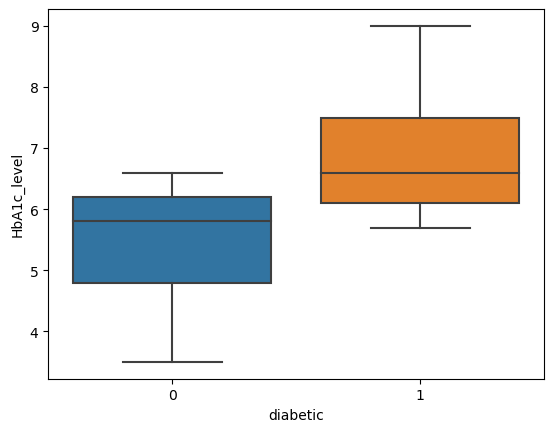

In [30]:
sns.boxplot(y=train.HbA1c_level, x=train.diabetic)
plt.show()

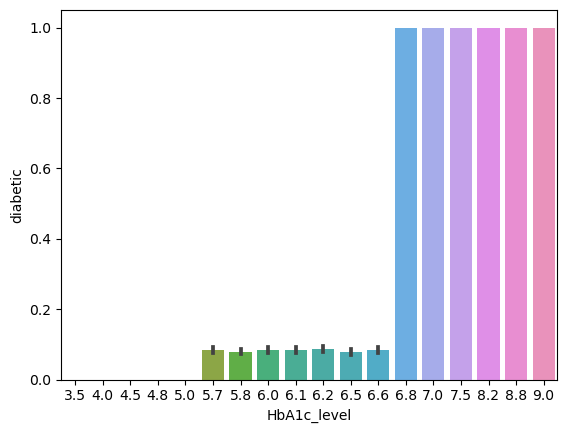

In [31]:
sns.barplot(x=train.HbA1c_level, y=train.diabetic)
plt.show()

- diabetics have a higher a1c than non diabetics
- 6.5 to 7.5 range for those who are and a meadian at about 6.7
- 4.8 to 6.2 for those how aren't  and a meadian at about 5.8
- average for diabetic is 6.9
- average for non diabetic is 5.4

#### H$o$: Higher A1c does not a sign of diabetes
#### H$a$: Having a higher A1c is a sign of diabetes

In [32]:
test_results = stats.ttest_1samp(diabetic_A1c, overall_A1c_mean)
test_results


Ttest_1sampResult(statistic=90.18690588786937, pvalue=0.0)

We can reject the null hypothesis with a p of 0.00

### Does Gender play a role in diabetes

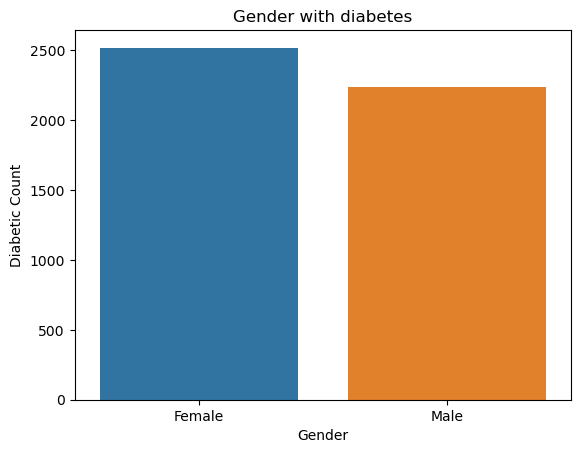

In [33]:
# count the number of occurrences of each bin
diabetic_count = train[train['diabetic'] == 1].groupby('gender')['diabetic'].count()

# create a bar plot
sns.barplot(x=diabetic_count.index, y=diabetic_count)

# add axis labels and title
plt.xlabel('Gender')
plt.ylabel('Diabetic Count')
plt.title('Gender with diabetes')

# show the plot
plt.show()

- not sure if there is enough of a signicant difference 
- may come back to this one

### Is BMI a significant indicator of diabetes?

In [34]:
train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetic,age_bin
7299,Female,77,0,0,never,25.60,6.6,90,0,70+
76197,Female,15,0,0,No Info,20.22,6.2,140,0,1-18
19159,Male,76,1,0,No Info,27.32,5.7,90,0,70+
68892,Female,16,0,0,never,29.07,4.5,155,0,1-18
49924,Female,40,0,0,not current,31.79,6.0,100,0,40-49


In [35]:
train.bmi.min()

10.01

In [36]:
train.bmi.max()

95.22

<AxesSubplot:xlabel='bmi', ylabel='age'>

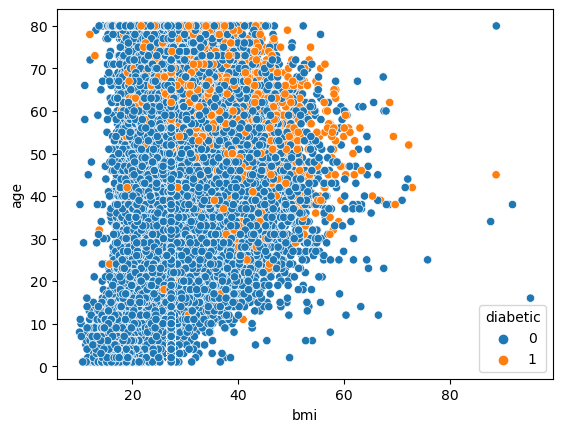

In [37]:
sns.scatterplot(data=train, x='bmi', y='age', hue='diabetic')

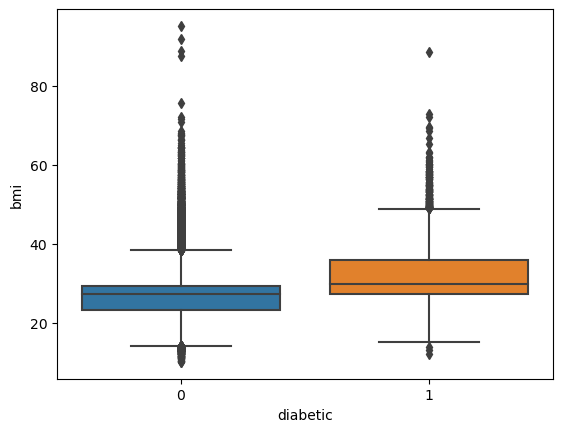

In [38]:
sns.boxplot(y=train.bmi, x=train.diabetic)
plt.show()

In [112]:
bmi_labels = [1, 2, 3, 4, 5, 6]
bmi_bins= [0, 18.5, 25, 30, 35, 40, 100]

- 1 underweight
- 2 normal
- 3 overweight
- 4 obesity class1
- 5 obesity class2
- 6 extreme obesity 

In [113]:
train['bmi_class'] = pd.cut(train.bmi, bins=bmi_bins, labels=bmi_labels)

In [122]:
round(train.bmi_class.value_counts(normalize=True), 2)

3    0.44
2    0.23
4    0.13
1    0.08
5    0.07
6    0.05
Name: bmi_class, dtype: float64

In [119]:
train[train.diabetic == 1].bmi.std()


7.570917556348748

In [120]:
train[train.diabetic == 0].bmi.std()

6.4658817198111285

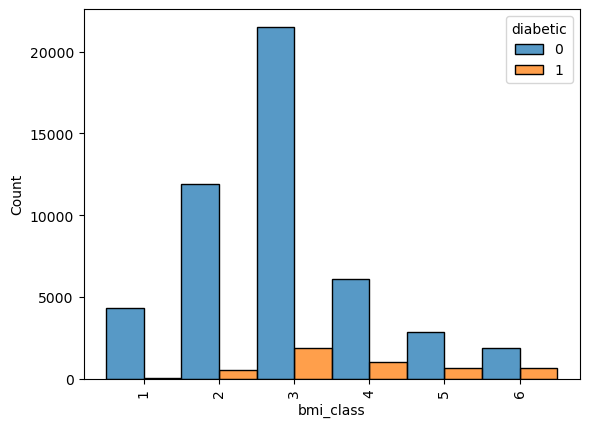

In [115]:
sns.histplot(data=train, x='bmi_class', hue='diabetic', multiple='dodge')
plt.xticks(rotation=90)
plt.show()

In [109]:
bmi_diabetic_values = train[train.diabetic == 1].bmi
bmi_non_diabetic_values = train[train.diabetic == 0].bmi

In [110]:
t , p = stats.ttest_ind(bmi_diabetic_values, bmi_non_diabetic_values)

In [111]:
t, p

(49.890226213321455, 0.0)

- Lots of outliers on either side
- the medians for both sit pretty close to each other
- might not be significant enough either

### Is hypertension a potential sign of diabetes

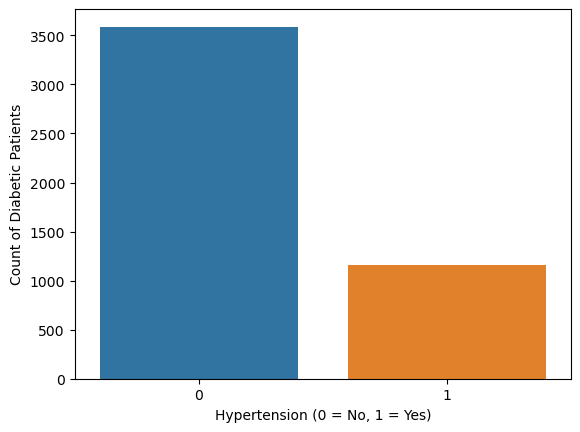

In [42]:

counts = train.groupby('hypertension')['diabetic'].value_counts().unstack()


sns.barplot(x=counts.index, y=counts[1])
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Count of Diabetic Patients')
plt.show()


- more without hypertension have diabetes then do
- might not be a good feature to use

In [48]:
train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetic', 'age_bin'],
      dtype='object')

### Is heart disease a significat indicator of diabetes?

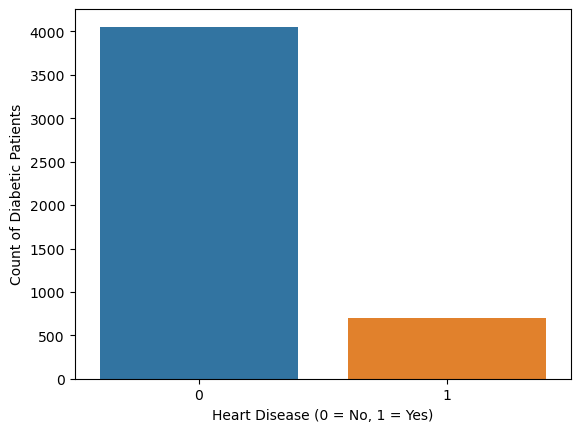

In [49]:
counts = train.groupby('heart_disease')['diabetic'].value_counts().unstack()


sns.barplot(x=counts.index, y=counts[1])
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count of Diabetic Patients')
plt.show()

- same as hypertension
- not a good feature to use

### How about Blood glucose level? 

- Hesitant to use this because without knowing what time these levels were taken could make this column irrelivant 
- Are these number from  a final measure of a glucose tolerance test or just random times?
-  *Data Card does not explicitly say 

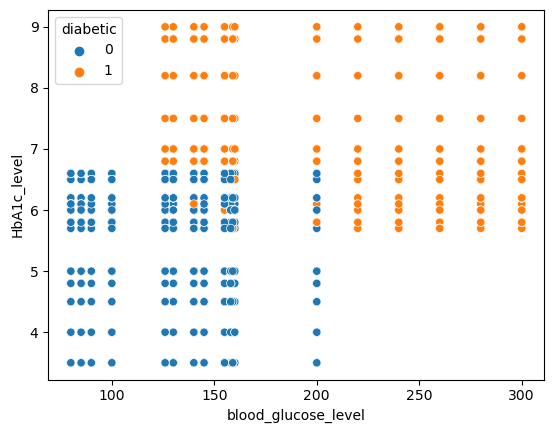

In [61]:
sns.scatterplot(x=train.blood_glucose_level, y=train.HbA1c_level, hue=train.diabetic)
plt.show()

In [62]:
train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetic', 'age_bin'],
      dtype='object')

### Finally what about smoking history?

In [63]:
counts = train.groupby('smoking_history')['diabetic'].value_counts().unstack()

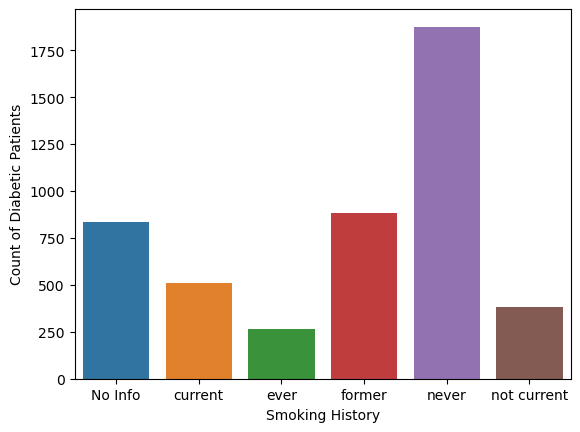

In [65]:
sns.barplot(x=counts.index, y=counts[1])
plt.xlabel('Smoking History')
plt.ylabel('Count of Diabetic Patients')
plt.show()

In [75]:
train[(train.diabetic == 1) & (train.blood_glucose_level == 200)]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetic,age_bin
46557,Male,76,0,0,never,28.00,9.0,200,1,70+
91271,Male,47,1,0,former,31.13,6.8,200,1,40-49
69356,Male,80,0,0,never,31.01,9.0,200,1,70+
15662,Male,77,0,0,never,23.52,6.2,200,1,70+
11561,Male,65,0,0,ever,40.03,9.0,200,1,60-69
...,...,...,...,...,...,...,...,...,...,...
16352,Female,51,0,0,current,29.10,7.5,200,1,50-59
28096,Male,60,0,1,No Info,39.02,6.1,200,1,60-69
81250,Female,72,0,0,former,43.45,6.1,200,1,70+
56406,Male,4,0,0,No Info,17.23,5.8,200,1,1-18


(53321, 10)